<a href="https://www.kaggle.com/code/shilongzhuang/school-shootings-data-storytelling-with-plotly?scriptVersionId=99254963" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🔫 School Shootings: Data Storytelling with Plotly
1. [Setting up](#1)
2. [Data Cleaning](#2)
3. [Exploratory Data Analysis](#3)
    * 3.1. School Shooting Incidents
        * 3.1.1. [School Shootings over the Years](#3.1.1)
        * 3.1.2. [School Shootings by School Levels](#3.1.2)
        * 3.1.3. [Where not to Hide when Faced with the Shooter](#3.1.3)
        * 3.1.4. [Favorite Time of Attack](#3.1.4)
        * 3.1.4. [Primary Factors that Led to Shooting](#3.1.5)
    * 3.2. Shooters  
        * 3.2.1. [Motive of the Shooters](#3.2.1)
        * 3.2.2.. [Shooters' Demographics](#3.2.2)
    * 3.3. Victims  
        * 3.3.1. [Victims' Demographics](#3.3.1)
        * 3.3.2. [Male vs Female Victims](#3.3.2)
        * 3.3.3. [Fatality of Victims' Injuries](#3.3.3)
        * 3.3.4. [Deadliest School Shooting Incidents](#3.3.4)

# 1. Setting up <a class="anchor" id="1"></a>

In [1]:
# Data Analysis
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go

from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
pio.templates.default = "none"

In [2]:
dfi = pd.read_csv('../input/us-school-shootings-19702022/INCIDENT.csv')
dfs = pd.read_csv('../input/us-school-shootings-19702022/SHOOTER.csv')
dfv = pd.read_csv('../input/us-school-shootings-19702022/VICTIM.csv')
dfw = pd.read_csv('../input/us-school-shootings-19702022/WEAPON.csv')

In [3]:
dfi.head()

,Incident_ID,Sources,Number_News,Media_Attention,Reliability,Date,Quarter,School,City,State,...,Accomplice,Hostages,Barricade,Officer_Involved,Bullied,Domestic_Violence,Gang_Related,Preplanned,Shots_Fired,Active_Shooter_FBI
0,20220601CAULL,https://www.foxla.com/news/grant-high-school-v...,10,Regional,4,2022/6/1,Summer,Ulysses S. Grant Senior High School,Los Angeles,CA,...,No,No,No,No,No,No,Yes,No,NaN,No
1,20220531LAMON,https://www.wwltv.com/article/news/crime/one-d...,100,National,4,2022/5/31,Spring,Morris Jeff High School,New Orleans,LA,...,No,No,No,No,No,No,No,No,99,No
2,20220530CAHEL,https://www.sandiegouniontribune.com/news/publ...,3,Local,4,2022/5/30,Spring,Helix High School,La Mesa,CA,...,No,No,No,No,No,No,NaN,No,99,No
3,20220529ILDAC,https://abc7chicago.com/chicago-shooting-crime...,5,Local,4,2022/5/29,Spring,Daniel Webster Public School,Chicago,IL,...,Yes,No,No,No,No,No,NaN,No,97,No
4,20220526SCMEG,https://abcnews4.com/news/local/coroner-releas...,5,Local,4,2022/5/26,Spring,Mevers School of Excellence,Goose Creek,SC,...,NaN,No,No,No,No,NaN,NaN,No,99,No


# 2. Data Cleaning <a class="anchor" id="2"></a>

In [4]:
dfi.rename(lambda x: x.lower(), axis='columns', inplace=True)
dfs.rename(lambda x: x.lower(), axis='columns', inplace=True)
dfv.rename(lambda x: x.lower(), axis='columns', inplace=True)
dfw.rename(lambda x: x.lower(), axis='columns', inplace=True)

In [5]:
dfi.columns

Index(['incident_id', 'sources', 'number_news', 'media_attention',
       'reliability', 'date', 'quarter', 'school', 'city', 'state',
       'school_level', 'location', 'location_type', 'during_school',
       'time_period', 'first_shot', 'summary', 'narrative', 'situation',
       'targets', 'accomplice', 'hostages', 'barricade', 'officer_involved',
       'bullied', 'domestic_violence', 'gang_related', 'preplanned',
       'shots_fired', 'active_shooter_fbi'],
      dtype='object')

In [6]:
dfi['date'] = dfi['date'].astype('datetime64')
dfi['year'] = dfi['date'].dt.year

# 3. Exploratory Data Analysis <a class="anchor" id="3"></a>

Color palettes used to create rich and engaging data storytelling:

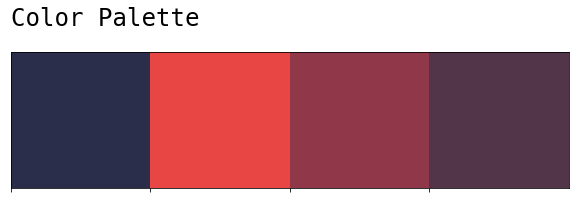

In [7]:
# color palette for visualizations
colors = ['#2B2E4A', '#E84545', '#903749', '#53354A',]
palette = sns.color_palette( palette = colors)

sns.palplot(palette, size = 2.5)

plt.text(-0.5,
         -0.7,
         'Color Palette', 
         {'font':'monospace',
          'size': 24,
          'weight':'normal'}
        )

plt.show()

Defining a function to format my title along with my subtitles for cleaner presentation of insights. 

In [8]:
def format_title(title, subtitle=None, subtitle_font=None, subtitle_font_size=None):
    title = f'<b>{title}</b>'
    if not subtitle:
        return title
    subtitle = f'<span style="font-family: {subtitle_font}; font-size: {subtitle_font_size}px;">{subtitle}</span>'
    return f'{title}<br>{subtitle}'

<a class="anchor" id="3.1"></a>
## 3.1.1. School Shootings over the Years

In [9]:
_ = dfi.groupby('year')['incident_id'].count().reset_index()

fig = go.Figure()

fig.add_trace(go.Scatter(x = _['year'],
                         y = _['incident_id'],
                         line = dict(color = '#E84545',
                                     width = 3,
                                     dash = 'solid')))

title = format_title('School Shootings over the Years',
                     'Although uncommon, gun violence in schools have been a pervasive issue and greatly increased in the most recent years.',
                     'Courier New',
                     12
                    )

fig.update_layout(title=title,
                  titlefont={'size': 24,
                             'family': 'Proxima Nova',
                            },
                  template='plotly_dark',
                  paper_bgcolor='#2B2E4A',
                  plot_bgcolor='#53354A',               
                  height = 600
                 )

fig.show()

In [10]:
lvls = dfi.school_level.unique().tolist()
lvls = ['High', 'Elementary', 'Middle', 'Junior High' , 'K-8', 'K-12', '6-12']

<a class="anchor" id="3.1.2"></a>
## 3.1.2. School Shootings by School Levels

In [11]:
_ = [ dfi[dfi.school_level == l].groupby('year')['incident_id'].count().reset_index() for l in lvls]

x = 0
fig = go.Figure()

color = ['#E84545', '#E9A6A6', '#864879', '#E84545', '#E9A6A6', '#864879']

for l in lvls:
    if (x == 0) | (x == 1) | (x == 2):
        fig.add_trace(go.Scatter(x = _[x]['year'],
                                 y = _[x]['incident_id'],
                                 line = dict(color = color[x],
                                             width = 3,
                                             dash = 'solid'),
                                 name = l,
                                ))
        
    else:
         fig.add_trace(go.Scatter(x = _[x]['year'],
                                 y = _[x]['incident_id'],
                                 line = dict(color = '#903749',
                                             width = 1,
                                             dash = 'solid'),
                                 name = l))
            
    x += 1

    
title = format_title('School Shootings by School Levels')

fig.update_layout(title=title,
                  titlefont={'size': 24,
                             'family': 'Proxima Nova',
                            },
                  template='plotly_dark',
                  paper_bgcolor='#2B2E4A',
                  plot_bgcolor='#2B2E4A',
                  height = 600
                 )

fig.show()

<a class="anchor" id="3.1.3"></a>
## 3.1.3. Where not to Hide when Faced with the Shooter

In [12]:
_ = dfi.groupby(['location_type','location'])['incident_id'].count().sort_values(ascending=False).reset_index()

fig = px.treemap(_.loc[_.location_type != 'ND'],
                 path = ['location_type', 'location'],
                 values='incident_id')

title = format_title('Most Common Locations of School Shootings!',
                     'Where not to hide from the shooter...',
                     'Courier New',
                     12
                    )

fig.update_layout(title=title,
                  titlefont={'size': 24,
                             'family': 'Proxima Nova',
                            },
                  template='plotly_dark',
                  paper_bgcolor='#2B2E4A',
                  plot_bgcolor='#2B2E4A',
                  treemapcolorway = ["#903749", "#F05454"],
                 
                  margin=dict(t=100,
                              b=60,
                             )
                 )

fig.show()

<a class="anchor" id="3.1.4"></a>
## 3.1.4. Favorite Time of Attack

In [13]:
_ = dfi.groupby('time_period')['incident_id'].count().sort_values(ascending=True).reset_index()
_['percent'] = _['incident_id'].apply(lambda x: round(x*100/(dfi.time_period.count()), 2) )

fig = px.bar(_, 
             y="time_period",
             x='incident_id',
             orientation='h',
             text_auto=True,
            )

fig.update_layout(title='<b>Favorite Time of Attack<b>',
                  titlefont={'size': 24,
                             'family': 'Proxima Nova',
                            },
                  template='plotly_dark',
                  paper_bgcolor='#2B2E4A',
                  plot_bgcolor='#2B2E4A',
                  yaxis_title=None,
                  xaxis_title='% of All School Shootings'
                 )

fig.add_vline(
    x = _.incident_id.mean(),
    line_width = 2,
    line_dash = 'dash',
    annotation_text = round(_.incident_id.mean(), 0),
    annotation_position = 'top',
)

color = ['#903749',]*14
for c in range(8,14):
    color[c] = '#E84545'

fig.update_traces(textfont_size=12,
                  textangle=0,
                  textposition='outside',
                  cliponaxis=False,
                  marker_color = color,
                 )

fig.show()

<a class="anchor" id="3.1.5"></a>
## 3.1.5. Primary Factors that Led to Shooting

In [14]:
# Cleaning duplicate data
dfi['situation'] = dfi['situation'].replace('Murder/Suicide ', 'Murder/Suicide')
dfi.situation.unique()

array(['Escalation of Dispute', nan, 'Accidental',
       'Indiscriminate Shooting', 'Drive-by Shooting', 'Illegal Activity',
       'Officer-Involved Shooting', 'Suicide/Attempted',
       'Intentional Property Damage', 'Domestic w/ Targeted Victim',
       'Hostage/Standoff', 'Psychosis', 'Unknown', 'Self-defense',
       'Bullying', 'Anger Over Grade/Suspension/Discipline',
       'Murder/Suicide', 'Racial'], dtype=object)

In [15]:
_ = dfi.groupby('situation')['incident_id'].count().sort_values(ascending=True).reset_index()
_['percent'] = _['incident_id'].apply(lambda x: round(x*100/(dfi.time_period.count()), 2) )

fig = px.bar(_, 
                   y="situation",
                   x='incident_id',
                   orientation='h',
                   text_auto=True,
                   template="plotly_dark"
                   )

fig.update_layout(title='<b>Primary Factors that Led to the Shooting<b>',
                  titlefont={'size': 24,
                             'family': 'Proxima Nova',
                            },
                  template='plotly_dark',
                  paper_bgcolor='#2B2E4A',
                  plot_bgcolor='#2B2E4A',
                  yaxis_title=None,
                  xaxis_title='% of All School Shootings'
                 )

fig.add_vline(
    x = _.incident_id.mean(),
    line_width = 2,
    line_dash = 'dash',
    annotation_text = round(_.incident_id.mean(), 0),
    annotation_position = 'top',
)

color = ['#AF2D2D',]*17
for c in range(12,17):
    color[c] = '#F05454'

fig.update_traces(textfont_size=12,
                  textangle=0,
                  textposition='outside',
                  cliponaxis=False,
                  marker_color=color,
                 )

fig.show()

<a class="anchor" id="3.2.1"></a>
## 3.2.1. Motive of the Shooters

In [16]:
import plotly.figure_factory as ff

_ = dfi.groupby(['targets', 'situation']).targets.size().unstack()
z = _.values.tolist()
x = _.columns.tolist()
y = _.index.tolist()

fig = ff.create_annotated_heatmap(z = z,
                                  x = x,
                                  y = y,
                                  xgap = 3,
                                  ygap = 3,
                                  colorscale = ['#53354A', '#E84545']
                                 )

title = format_title('Motive of the Shooters',
                     'Most shootings were driven by intense escalation of dispute with the shooters intention to target their victims.',
                     'Courier New',
                     12
                    )

fig.update_layout(title_text = title,
                  title_x = 0.5,
                  titlefont={'size': 24,
                             'family': 'Proxima Nova',
                            },
                  template='plotly_dark',
                  paper_bgcolor='#2B2E4A',
                  plot_bgcolor='#2B2E4A',
                  
                  xaxis = {'side': 'bottom'},
                  xaxis_showgrid = False,
                  yaxis_showgrid = False,
                  yaxis_autorange = 'reversed',                   
                  )

fig.show()

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.



The creators of the database clearly established and defined a set of situations to provide context for the primary factors involved in the instigation of the shooting:
- **Accidental:** No intent to fire the weapon (e.g., showing off gun and it went off; gun in
backpack went off).
- **Anger Over Grade/Suspension/Discipline:** Primarily targeted teacher or school
administrator due to poor grades, suspension, expulsion, or discipline. Also includes a
school employee who targeted a school administrator or coworker following poor
performance evaluation, suspension, or loss of employment.
- **Bullying:** Bullied by the victim(s) and did not indiscriminately target random students.
- **Domestic w/ Targeted Victim:** Had a romantic or familial relationship with the victim
or victim was in a romantic relationship with a former lover of the shooter
- **Drive-by:** Shots fired by a person in a vehicle at people, or another vehicle, on school
property.
- **Escalation of Dispute:** Physical or verbal altercation between the shooter and victim
prior to the shooting or retaliation for a prior altercation or attack (e.g., during a fight
between multiple students, one of the students involved pulled out a handgun and
fired; following an argument earlier in the day, a student shot the other student that
he/she argued with in the school parking lot).
- **Hostage/Standoff:** A standoff at the school between an armed shooter and law
enforcement with or without hostages taken. Hostages may have been released
without injury and/or no shots were fired during the standoff.
- **Illegal Activity:** Shots were fired during a robbery, sale or exchange of illegal drugs,
trespassing, theft of property, or exchange of stolen property.
- **Indiscriminate:** Targeted random victims with the intent to kill or injure as many as
possible (e.g., fired into a crowd; shot students in the hallway and random
classrooms).
- **Intentional Property Damage:** Shots were fired to cause damage to the school
building or vehicles on school property without intent to cause injury.
- **Psychosis:** Described as disconnected from reality and exhibiting symptoms of a
severe psychotic episode, or having paranoid schizophrenia stated in open-source reports (e.g., shooter believed the school was sending mind control signals or part of a
government conspiracy).
- **Murder/Suicide:** Shot targeted victim and then immediately killed self (including
other bystanders who were struck by gunfire but were not intended targets).
- **Officer Involved Shooting:** Police officer, SRO, or armed security guard was the only
person to fire a weapon.
- **Racial:** Shooter targeted victim based on race.
- **Self Defense:** Shooter fired in self-defense or defense of someone else.
- **Suicide/Attempted:** Suicide or attempted suicide by a shooter who was the only
victim (not an indiscriminate shooting or revenge/bullying where shooter kills self
during the shooting).

<a class="anchor" id="3.2.2"></a>
## 3.2.2. Shooters' Demographics

There were a lot of missing informamtion about the shooters' and victims' demographics such as *Gender, Race, and SchoolAffiliation.* I decided to replace them by *Unknown* to prevent bias.

In [17]:
dfs.gender.fillna('Unknown', inplace=True)
dfs.race.fillna('Unknown', inplace=True)
dfs.schoolaffiliation.fillna('Unknown', inplace=True)

dfv.gender.fillna('Unknown', inplace=True)
dfv.race.fillna('Unknown', inplace=True)
dfv.schoolaffiliation.fillna('Unknown', inplace=True)

In [18]:
_ = dfs.groupby(['gender', 'race', 'schoolaffiliation']).size().reset_index()
_.rename(columns = {0: 'count'}, inplace=True)
_.sort_values(by='count', ascending=False)

fig = px.sunburst(
    _,
    path = ['gender', 'race', 'schoolaffiliation'],
    values = 'count',
    color = 'count',
    color_continuous_scale = [
        '#53354A',
        '#903749',
        '#E84545',
    ],
)

title = format_title('Shooters Demographics',
                     'Do note that insights generated are completely based on the data and charts: <br>- 80% of the shooters are males.<br>- Around 40% of the shooters are students, of these, white and black<br>are the most common.<br>- In context of the shooters school affiliation, the 2nd most common shooters next to students<br>are not related with the schools.',
                     'Courier New',
                     12
                    )

fig.update_layout(title=title,
                  titlefont={'size': 24,
                             'family': 'Proxima Nova',
                            },
                  template='plotly_dark',
                  paper_bgcolor='#2B2E4A',
                  plot_bgcolor='#2B2E4A',
                  height = 1000,
                  width = 800,
                  margin = dict(t=120, b=0)
                 )

fig.update_traces(
    textinfo = 'label + percent root',
    hovertemplate = None,
)               

fig.show()

<a class="anchor" id="3.3.1"></a>
## 3.3.1. Victims' Demographics

*Race* will be excluded from the analyses due to large number of missing values.

In [19]:
_ = dfv.groupby(['gender', 'schoolaffiliation']).size().reset_index()
_.rename(columns = {0: 'count'}, inplace=True)
_.sort_values(by='count', ascending=False)

fig = px.sunburst(
    _,
    path = ['gender', 'schoolaffiliation'],
    values = 'count',
    color = 'count',
    color_continuous_scale = [
        '#53354A',
        '#903749',
        '#E84545',
    ],
)

title = format_title('Victims Demographics',
                     'Do note that insights generated are completely based on the data and charts: <br>- Males are more likely to be the victims.<br>- 60% of the victims were students.',
                     'Courier New',
                     12
                    )

fig.update_layout(title=title,
                  titlefont={'size': 24,
                             'family': 'Proxima Nova',
                            },
                  template='plotly_dark',
                  paper_bgcolor='#2B2E4A',
                  plot_bgcolor='#2B2E4A',
                  height = 1000,
                  width = 800,
                  margin = dict(t=120, b=0),
                 )

fig.update_traces(
    textinfo = 'label + percent root',
    hovertemplate = None,
)               

fig.show()

<a class="anchor" id="3.3.2"></a>
## 3.3.2. Male vs Female Victims

In [20]:
_ = dfi[['incident_id', 'situation']]
dfv.rename(columns = {'incidentid': 'incident_id'}, inplace=True)

dfv = pd.merge(
    _,
    dfv,
    on = 'incident_id',
    how = 'right', 
)

In [21]:
genders = ['Male', 'Female']
_ = [ dfv[dfv.gender == g].groupby('situation')['incident_id'].count().reset_index() for g in genders]

x = 0
fig = go.Figure()


for g in genders:
    if (x == 0):
        fig.add_trace(go.Scatter(x = _[x]['situation'],
                                 y = _[x]['incident_id'],
                                 line = dict(color = 'cornflowerblue',
                                             width = 3,
                                             dash = 'solid'),
                                 name = g,
                                ))
        
    else:
         fig.add_trace(go.Scatter(x = _[x]['situation'],
                                 y = _[x]['incident_id'],
                                 line = dict(color = 'lightpink',
                                             width = 3,
                                             dash = 'solid'),
                                 name = g))
            
    x += 1

    
title = format_title('Male vs Female Victims',
                     'While males were cumulatively likelier to be the victims in school shootings, females were <b>1.6x<b> more common to be the targeted victims<br>of domestic relationships and 4x more frequent to be murdered by the shooter before committing suicide.',
                     'Courier New',
                     12
                    )

fig.update_layout(title=title,
                  titlefont={'size': 24,
                             'family': 'Proxima Nova',
                            },
                  template='plotly_dark',
                  paper_bgcolor='#2B2E4A',
                  plot_bgcolor='#2B2E4A',
                  height = 800
                 )

fig.show()

<a class="anchor" id="3.3.3"></a>
## 3.3.3. Fatality of Victims' Injuries

In [22]:
_ = dfv.groupby(['situation', 'injury']).size().reset_index()
_.rename(columns = {0: 'count'}, inplace=True)

fig = px.bar(_, 
             y="situation",
             x='count',
             orientation = 'h',
             color='injury',
             color_discrete_sequence = [
                 '#E84545',
                 '#903749',
                 '#B4E197',
                 '#53354A',
             ],
             text_auto=True,
            )

fig.update_layout(title='<b>Injuries Sustained by the Victims<b>',
                  titlefont={'size': 24,
                             'family': 'Proxima Nova',
                            },
                  template='plotly_dark',
                  paper_bgcolor='#2B2E4A',
                  plot_bgcolor='#2B2E4A',
                  yaxis_title=None,
                  xaxis_title='% of All School Shootings',
                  height=1000
                 )

fig.update_traces(textfont_size=12,
#                   textangle=0,
#                   textposition='outside',
#                   marker_color=color,
                 )

fig.update_yaxes(categoryorder='total ascending')

fig.update_traces(
#     textinfo = 'label + percent root',
    hovertemplate = None,
)

fig.show()

<a class="anchor" id="3.3.4"></a>
## 3.3.4. Deadliest School Shooting Incidents

In [23]:
ave = dfv.groupby(['situation', 'incident_id']).size().reset_index()
ave.rename(columns = {0: 'average'}, inplace=True)
ave = ave.groupby(['situation'])['average'].mean().reset_index().sort_values(by='average', ascending=True)

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=ave['situation'],
    y=ave['average'],
    line=dict(
            color='#F05454',
            width=3,
            dash='solid')))

title = format_title('Average Number of Victims in Every Situation',
                     'Some of the deadliest school shootings were due to indiscriminate shooting, hostage/standoff, and racial as it inflicted the highest<br>average number of victims.',
                     'Courier New',
                     12
                    )

fig.update_layout(title=title,
                  titlefont={'size': 24,
                             'family': 'Proxima Nova',
                            },
                  template='plotly_dark',
                  paper_bgcolor='#2B2E4A',
                  plot_bgcolor='#2B2E4A',
                  height = 800
                 )
              
fig.show()

Congratulations for reaching to the end of the notebook. Kindly give an upvote if you find my work engaging and informative :D. If you have any questions and concerns regarding my code, feel free to drop them on the comments and I would be happy to engage with you.
___
## My Portfolio

I would appreciate if you could check out my other works under my [PROFILE](https://www.kaggle.com/shilongzhuang):
- [Plotly Advanced Charts: EDA on Unicorn Startups](https://www.kaggle.com/code/shilongzhuang/plotly-advanced-charts-eda-on-unicorn-startups)
- [Attack-on-Titanic Solution Walkthrough (No Data Leakage)](https://www.kaggle.com/code/shilongzhuang/attack-on-titanic-solution-no-data-leakage)
- [Space Titanic: A Beginner Guide (80% accuracy)](https://www.kaggle.com/code/shilongzhuang/space-titanic-a-beginner-guide-80-24-accuracy/notebook?scriptVersionId=97307865)